"""
Car Price Prediction Project
----------------------------
This script includes:
1. Loading and preprocessing data
2. Exploratory Data Analysis (EDA)
3. Training and evaluating multiple regression models
4. Saving the best performing model
"""

In [98]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import os
import joblib
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load dataset 

data= pd.read_csv("cardata.csv")
df= pd.DataFrame(data)


In [99]:
# Display basic info
print("Dataset Preview:")
df.head()


Dataset Preview:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [100]:
df.sort_values(by='Year')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
54,innova,2005,2.75,10.21,90000,Petrol,Individual,Manual,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0
265,jazz,2017,6.50,8.70,21200,Petrol,Dealer,Manual,0
66,innova,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0
134,TVS Apache RTR 160,2017,0.65,0.81,11800,Petrol,Individual,Manual,0


In [101]:
df.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


# Exploratory Data Analysis (EDA)


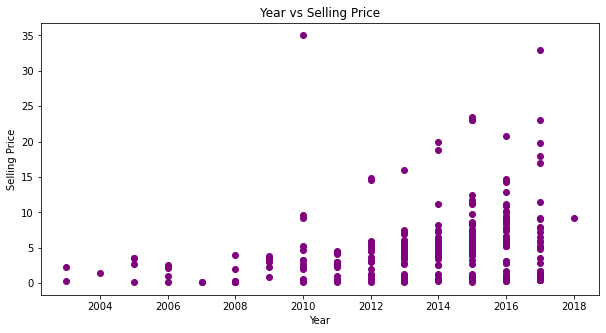

In [102]:
# Year vs Selling Price
plt.figure(figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.scatter(df['Year'], df['Selling_Price'], c='purple')
plt.title("Year vs Selling Price")
plt.show()

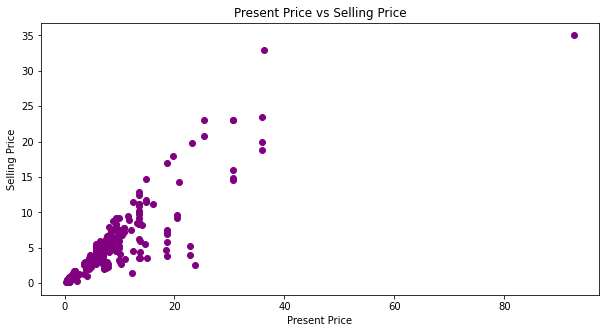

In [103]:
# Present Price vs Selling Price
plt.figure(figsize=(10, 5))
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.scatter(df['Present_Price'], df['Selling_Price'], c='purple')
plt.title("Present Price vs Selling Price")
plt.show()

In [104]:
df["Selling_Price"].nlargest(2)   

86    35.0
64    33.0
Name: Selling_Price, dtype: float64

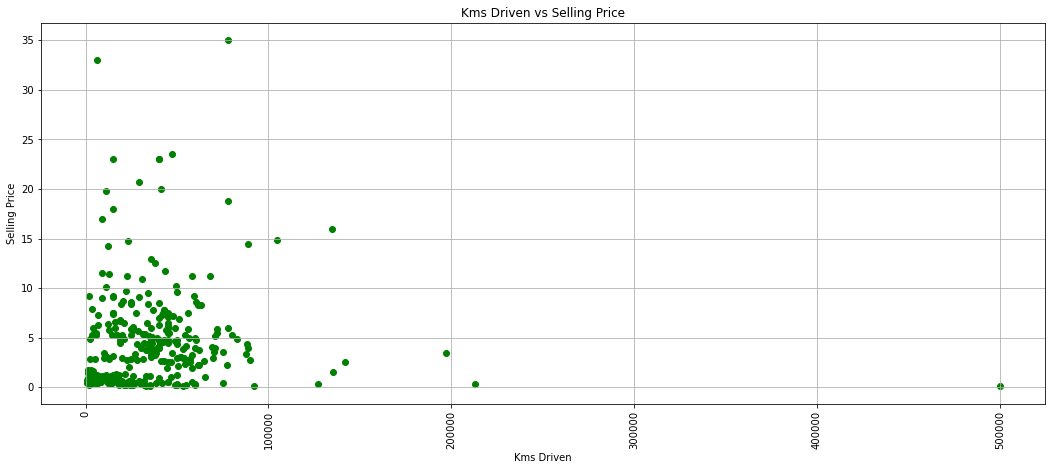

In [105]:
# Kms Driven vs Selling Price
plt.figure(figsize=(18, 7))
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.scatter(df['Kms_Driven'], df['Selling_Price'], color='green')
plt.title("Kms Driven vs Selling Price")
plt.grid()
plt.show()

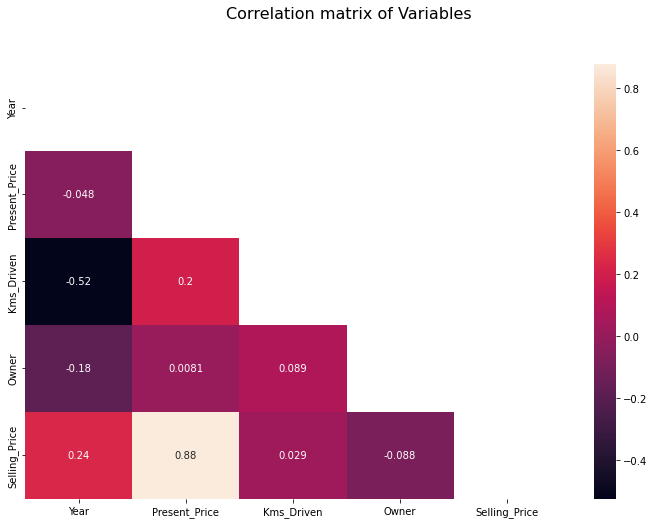

In [106]:
import seaborn as sns
matrix = df[['Year', 'Present_Price', 'Kms_Driven', 'Owner',"Selling_Price"]].corr()

# Create a figure with a specific size

plt.figure(figsize=(12, 8))

# Plot the heatmap with custom font sizes

sns.heatmap(matrix, mask=np.triu(matrix), annot=True, annot_kws={"size": 10})  # Control annotation font size

# Add a title with custom font size
plt.suptitle("Correlation matrix of Variables", fontsize=16)

# Control the font size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust axis tick font size

# Show the plot
plt.show()

In [13]:
df.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


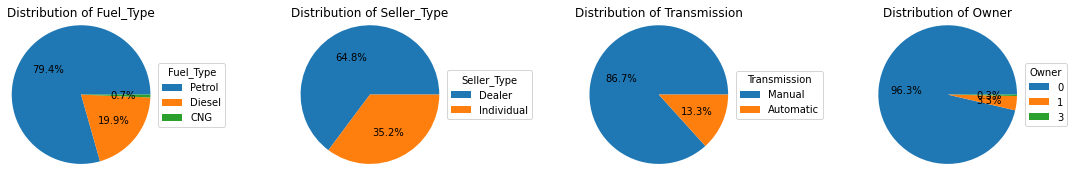

In [15]:
import math
variables = [ "Fuel_Type","Seller_Type","Transmission","Owner"]

# Dynamically determine rows and columns based on the number of variables
n_variables = len(variables)
n_cols = 4 
n_rows = math.ceil(n_variables / n_cols)  # Calculate rows dynamically
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for idx, variable in enumerate(variables):
    variable_counts = df[variable].value_counts()
    wedges, texts, autotexts = axes[idx].pie(
        variable_counts, autopct='%1.1f%%', radius=1.2
    )
    axes[idx].legend(
        variable_counts.index,
        title=variable,
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )
    axes[idx].set_title("Distribution of " + variable)
    axes[idx].set_ylabel('')  # Remove default ylabel for cleaner plots

for idx in range(len(variables), len(axes)):
    fig.delaxes(axes[idx])

# Adjust spacing between pie charts
plt.tight_layout()
plt.subplots_adjust(wspace=1.0, hspace=1.0)  # Increase horizontal and vertical spacing


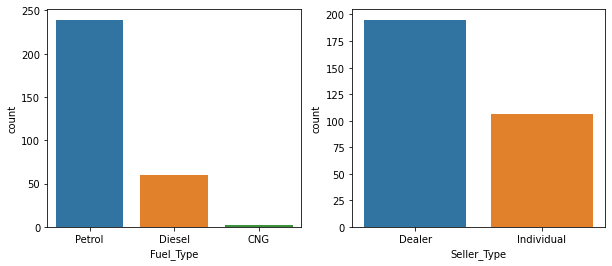

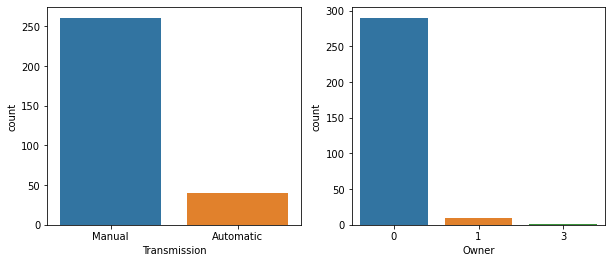

In [18]:
Categorical = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2, 1)
    sns.countplot(x=Categorical[i], data=df)
    i+= 1
    plt.subplot(1,2,2)
    sns.countplot(x=Categorical[i], data=df)
    i += 1
    plt.show()

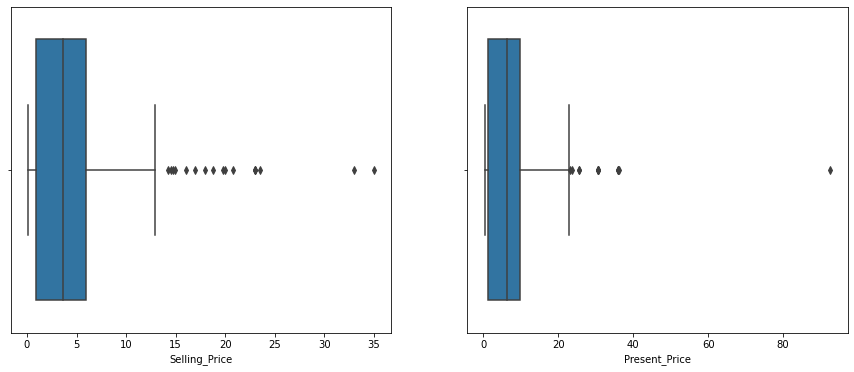

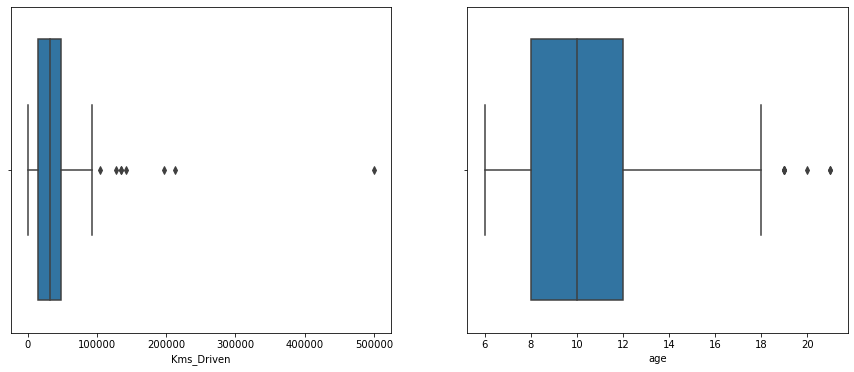

In [19]:
#box plot and find noise points
Numerical =['Selling_Price', 'Present_Price', 'Kms_Driven', 'age']
i = 0
while i < 4:
    fig = plt.figure(figsize=[15,6])
    plt.subplot(1,2, 1)
    sns.boxplot(x=Numerical[i], data=df)
    i+= 1
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i], data=df)
    i += 1
    plt.show()
    
    

# Data Preprocessing


In [108]:
df["age"]= 2024- df["Year"]
df.drop("Year", axis=1,inplace= True)
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,3.35,5.59,27000,2,2,2,0,10
1,sx4,4.75,9.54,43000,3,2,2,0,11
2,ciaz,7.25,9.85,6900,2,2,2,0,7
3,wagon r,2.85,4.15,5200,2,2,2,0,13
4,swift,4.60,6.87,42450,3,2,2,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,3,2,2,0,8
297,brio,4.00,5.90,60000,2,2,2,0,9
298,city,3.35,11.00,87934,2,2,2,0,15
299,city,11.50,12.50,9000,3,2,2,0,7


In [107]:
# Convert categorical columns to numeric
df["Fuel_Type"].replace({"Petrol":2 ,"Diesel":3 ,"CNG":4},inplace=True)
df["Seller_Type"].replace({"Dealer":2 ,"Individual":3}, inplace=True)
df["Transmission"].replace({"Manual":2 , "Automatic":3}, inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,2,2,0
1,sx4,2013,4.75,9.54,43000,3,2,2,0
2,ciaz,2017,7.25,9.85,6900,2,2,2,0
3,wagon r,2011,2.85,4.15,5200,2,2,2,0
4,swift,2014,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,3,2,2,0
297,brio,2015,4.00,5.90,60000,2,2,2,0
298,city,2009,3.35,11.00,87934,2,2,2,0
299,city,2017,11.50,12.50,9000,3,2,2,0


In [109]:
x=pd.DataFrame(df,columns=['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','age'])
y=df['Selling_Price'].values.reshape(-1,1)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

# Model Training and Evaluation


In [110]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Model Evaluation Results:
                        MAE       MSE      RMSE        R²
Linear Regression  1.000033  2.188556  1.479377  0.913418
Random Forest      0.608797  1.067028  1.032971  0.957787
Gradient Boosting  0.605001  0.964545  0.982112  0.961841


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


# Improving the linear regression model

In [111]:
reg= LinearRegression()
reg.fit(x_train,y_train)
y_Pred= reg.predict(x_test)
print(reg.intercept_)   
print(reg.coef_)         

[1.95055822]
[[ 4.36619980e-01 -5.48584299e-06  1.44377315e+00 -1.12076998e+00
   1.43830531e+00 -9.89222658e-01 -3.92595063e-01]]


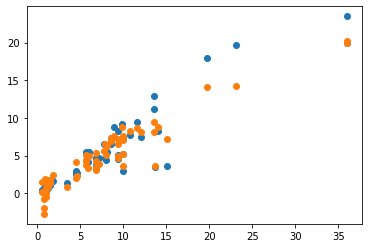

In [112]:
#Chart of predicted values and actual test values
a=x_test.Present_Price
b=y_test
c= x_test.Present_Price
d=y_Pred
plt.scatter(a,b)
plt.scatter(c,d)



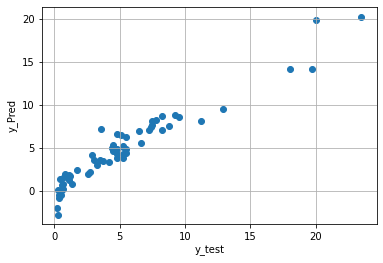

In [113]:
plt.xlabel('y_test')
plt.ylabel('y_Pred')
plt.grid()
plt.scatter(y_test, y_Pred)

In [28]:
c= pd.DataFrame({'Actual':y_test.flatten() ,"predicted":y_Pred.flatten()})
c

,Actual,predicted
0,8.25,7.151094
1,0.50,-0.423598
2,5.25,4.293174
3,9.50,8.654527
4,18.00,14.156778
...,...,...
56,0.65,0.289706
57,2.55,1.990973
58,4.15,3.415110
59,1.35,0.853054


In [114]:
#A loop to check features that improve the score
#making function
def check(Dimension,testsize):
    r2 =0.913418
    for column in x:
        New_Col_Name = column + str(Dimension)
        New_Col_Val = x[column] **Dimension
        x.insert(0, New_Col_Name, New_Col_Val)
        x_train, x_test, y_train, y_test =train_test_split (x, y, test_size= testsize, random_state=0)
        New_Model = LinearRegression()
        New_Model.fit(x_train,y_train)
        y_pred = New_Model.predict(x_test)
        r2_new = metrics.r2_score(y_test, y_pred)
        if r2_new < r2:
            x.drop([New_Col_Name], axis=1,inplace= True)
        else:
            r2 = r2_new
    print ('R2 score:', r2)
check(2,0.2)    



R2 score: 0.9311515426594803


In [115]:
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,10
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,11
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,7
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,13
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,10
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,8
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,9
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,15
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,7


# Re-improve the model
# Multiply important features together and place in a new column

In [116]:
#Another way: DotProduct features
Pres_Kms = x["Present_Price"]*x["Kms_Driven"]
Pres_Kms2 = x["Present_Price"]*x["Kms_Driven2"]
Pres_Fuel = x["Present_Price"]*x["Fuel_Type"]
Pres_Fue12 = x["Present_Price"]*x["Fuel_Type2"]
Pres2_Kms = x["Present_Price2"] *x["Kms_Driven"]
Pres2_Kms2 = x["Present_Price2"]*x["Kms_Driven2"]
Pres2_Fuel = x["Present_Price2"]*x["Fuel_Type"]
Pres2_Fue12 = x["Present_Price2"]*x["Fuel_Type2"]

In [117]:
x.insert(0,"Pres_Kms", Pres_Kms)
x.insert(0,"Pres_Kms2" ,Pres_Kms2)
x.insert(0,"Pres_Fuel", Pres_Fuel)
x.insert(0,"Pres_Fue12", Pres_Fue12)
x.insert(0, "Pres2_Kms",Pres2_Kms)
x.insert(0,"Pres2_Kms2", Pres2_Kms2)
x.insert(0, "Pres2_Fuel" ,Pres2_Fuel)
x.insert(0, "Pres2_Fue12", Pres2_Fue12)

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2 , random_state = 0)
model=LinearRegression()

results = {}
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
                        MAE      MSE      RMSE        R²
Linear Regression  0.659633  0.81882  0.904887  0.977723


In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(5)
result=cross_val_score(reg,x,y,cv=kfold)
print(result)
 

[  0.9179069    0.70797515 -21.91619101   0.66714735   0.88557343]


In [127]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
                        MAE       MSE      RMSE        R²
Linear Regression  0.659633  0.818820  0.904887  0.977723
Random Forest      0.748822  3.483062  1.866296  0.905238
Gradient Boosting  0.847855  2.771742  1.664855  0.924590


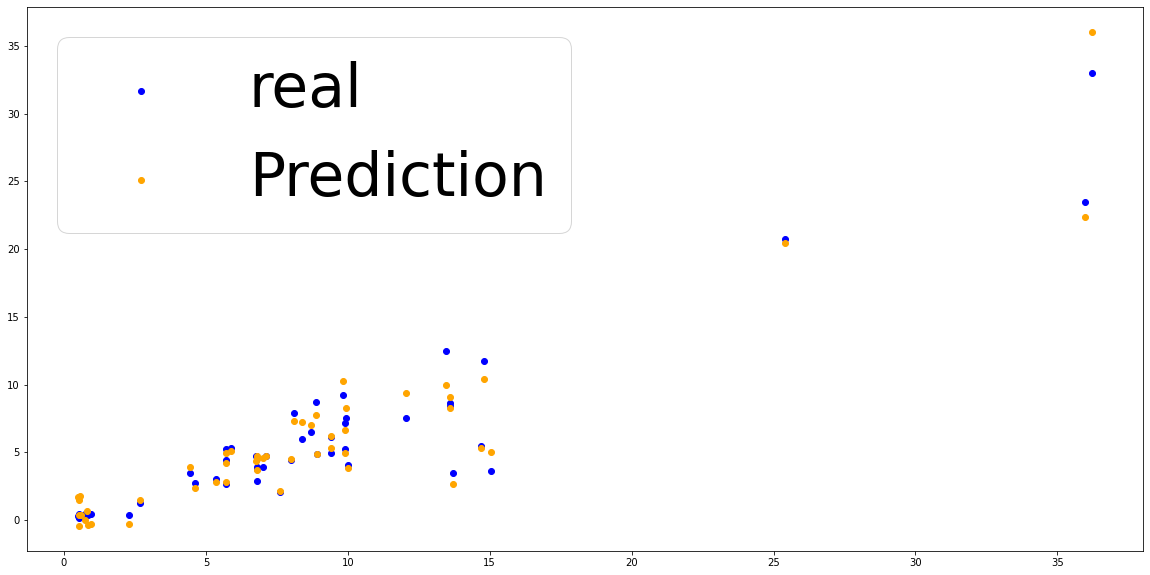

In [129]:
a=x_test["Present_Price"]
b=y_test
c=x_test.Present_Price
d=y_pred
plt.figure(figsize= (20,10))
plt.scatter(a,b,color='blue',label="real") 
plt.scatter(c,d, color='Orange',label="Prediction")
plt.legend(fontsize=60)
plt.show()

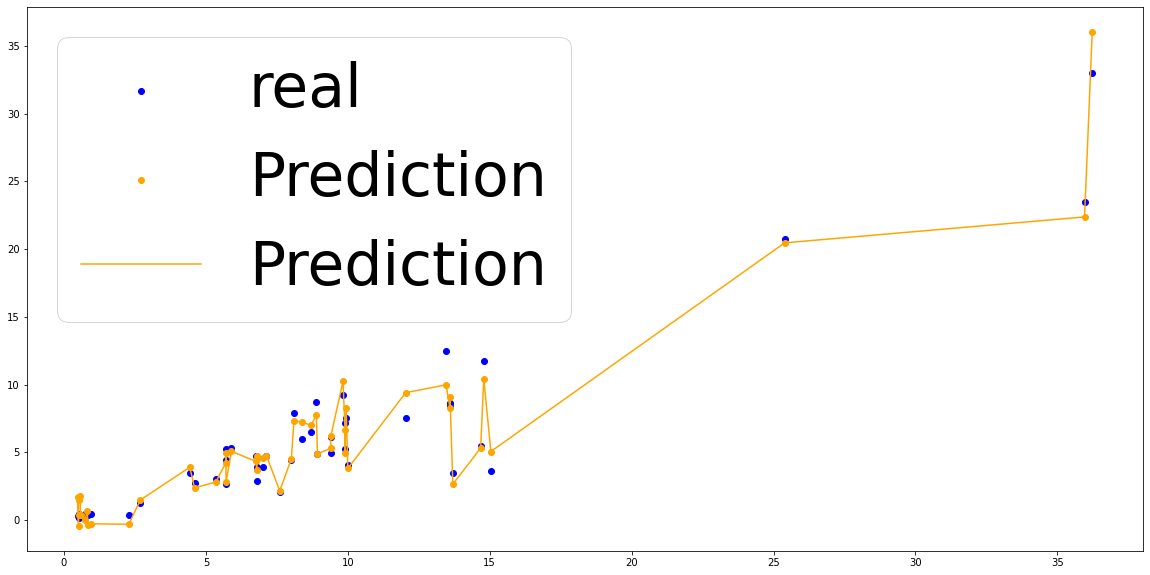

In [130]:
c=x_test.Present_Price
d=y_pred
point= list(zip(c,d))
point.sort(key= lambda point: point[0])
c_sorted, d_sorted=zip(*point)
plt.figure(figsize= (20,10))
plt.scatter(a,b,color='blue',label="real") 
plt.scatter(c,d, color='Orange',label="Prediction")
plt.plot(c_sorted, d_sorted, color='Orange',label="Prediction")
plt.legend(fontsize=60)
plt.show()

In [56]:
Present_Price=58
Fuel_type=2
KMS_driven=252321
Owner=1
Transmission=2
Seller_type=4
age=10
Model_Input = pd.DataFrame({'Target':10,
'Pres2_Fue12':[((Present_Price**2)*(Fuel_type**2))],
'Pres2_Fuel': [((Present_Price**2)*(Fuel_type))],
'Pres2_Kms2': [((Present_Price**2)*(KMS_driven**2))],
'Pres2_Kms': [((Present_Price**2)* (KMS_driven))],
'Pres_Fue12': [((Present_Price)*(Fuel_type**2))],
'Pres_Fuel': [((Present_Price)*(Fuel_type))],
'Pres_Kms2': [((Present_Price)*(KMS_driven**2))],
'Pres_Kms': [((Present_Price)*(KMS_driven))],
'Owner2':[Owner**2],                           
'Fuel_Type2' : [Fuel_type**2],
'Kms_Driven2' : [KMS_driven**2],
'Present_Price2': [Present_Price**2],
'Present_Price': [Present_Price],
'Kms_Driven' : [KMS_driven],
'Fuel_Type': [Fuel_type],
'Seller_Type': [Seller_type],
'Transmission' : [Transmission],
'Owner': [Owner],
'age': [age]})

In [49]:
Model_Input

,Target,Pres2_Fue12,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fue12,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,10,13456,6728,214172044005924,848807844,232,116,3692621448378,14634618,1,4,63665887041,3364,58,252321,2,4,2,1,10


In [57]:
Finall = df.append(Model_Input)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_920\2966077862.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Finall = df.append(Model_Input)


In [58]:
X_Finall = Model_Input.drop(["Target"], axis=1)


In [59]:
y_pred= reg.predict(X_Finall)
y_pred

array([[123.20565057]])

In [131]:
#Save the best model
best_model_name = results_df["R²"].idxmax()
best_model = models[best_model_name]
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")
print(f"Best model '{best_model_name}' saved successfully.")



Best model 'Linear Regression' saved successfully.


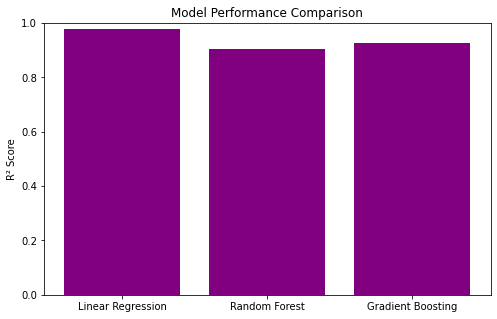

In [132]:
# 6. Visual Comparison of Models
plt.figure(figsize=(8, 5))
plt.bar(results_df.index, results_df["R²"], color="purple")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()